## Week3  逻辑回归(主要用于分类)
- Sigmoid Function(Logistic Function)
$$g(z)=\frac{1}{1+e^{-z}}$$
- Decision Boundary  
将两类数据分开的函数  
- Cost Function  
使用该损失函数的[原因](https://blog.csdn.net/xiaoxiangzi222/article/details/55097570)  
若使用线性的损失函数, 由于此时是Logistic Function, 会造成多个极值点, 容易到收敛到局部最小值.所以使用: 
$$J(\theta)=\frac{1}{m}\sum_1^mCost(h_\theta(x^{(i)}, y^{(i)})$$
$$Cost(h_\theta(x), y)=\begin{cases}-log(h_\theta(x))\ \ \ if\ y = 1\\
                          -log(1-h_\theta(x))\ \ \ if\ y = 0\\
                          \end{cases}$$
该函数也可以写成:  
$$J(\theta)=-\frac{1}{m}\sum_1^m[y^{(i)}log(h_\theta(x^{(i)}))+(1-y^{(i)})log(1-h_\theta(x^{(i)}))]$$
注意该损失函数是凸函数, 至于原因不知道............
- 梯度下降  
对该损失函数求导之后发现其导数与线性回归形式一致, 为:  
$$\theta_j = \theta_j-\frac{\alpha}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$
向量化后为:  
$$\theta = \theta - \frac{\alpha}{m}X^T(g(X\theta)-\vec y)$$
- Conjugate gradient, BFGS, L-BFGS  
三种比梯度下降法更快的求最优值方法, 且不需要设定学习率. 这三种方法一般调用库即可, 自己只需要编写损失函数以及损失函数的偏导函数.
- 过拟合的解决办法  
  1. 减少特征数量
  2. 正则化(减少参数的量级)  在原有的损失函数加上 &nbsp; $\lambda \sum_{j=1}^n\theta_j^2$  注意是从j=1开始, 因为$\theta_0$对应的$x_0$都是1
- 线性回归的正则化  
将正则化加入损失函数, 求其导数整理后得: 
$$\theta_0 = \theta_0-\alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_0^{(i)}$$
$$\theta_j = \theta_j(1-\alpha\frac{\lambda}{m})-\alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$
别的都和之前的一样, 只是每次$\theta$(除了$\theta_0$)都会乘一个$1-\alpha\frac{\lambda}{m}$, 易知该数为小于1的数  
对于Normal Equation, 也有:  
$$\theta = (X^TX+\lambda L)^{-1}X^Ty$$
将一个(n+1) * (n+1)的单位矩阵, 第一个元素置为0, 即得到$L$. $X^TX$可能是奇异矩阵, 不可逆, 但是$X^TX+\lambda L$将会是可逆的  
- 逻辑回归正则化的损失函数的导数与线性回归的形式一致. (只是$h_\theta(x^{(i)}不同$)


In [108]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 读入数据, 特征为两次考试分数  标签为是否被大学承认
data1 = pd.read_csv('data/ex2data1.txt', names=['score1', 'score2', 'admitted'])
print(data1.head())

      score1     score2  admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1


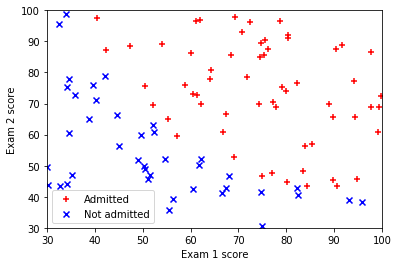

In [125]:
# 使用X保存两次分数, Y保存对应label
X = data1.iloc[:, :-1].values
Y = data1.iloc[:, [-1]].values
# label 为1的成绩
pos = X[Y[:,0]==1, :]
# label 为0的成绩
nag = X[Y[:,0]==0, :]
plt.scatter(pos[:,0], pos[:,1], c='r', marker='+', label='Admitted')
plt.scatter(nag[:,0], nag[:,1], c='b', marker='x', label='Not admitted')
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.xlim([30,100])
plt.ylim([30,100])
plt.legend(loc='best')
plt.show()

In [123]:
# 初始化
initial_theta = np.zeros((3,1))
m = len(Y)
X = np.c_[np.ones(m), X]

In [121]:
print(X[0]*initial_theta[:, 0])

[0. 0. 0.]


In [124]:
# 定义sigmoid函数, Cost函数和Gradient
sigmoid_func = lambda x: 1/(1+np.exp(-x))
def Cost(X, Y, theta):
    # X为m*n Y为m*1 theta为n*1
    return -1/len(Y)*((np.log(sigmoid_func(X.dot(theta)))*Y).sum() + (np.log(1-sigmoid_func(X.dot(theta)))*(1.0-Y)).sum())
def Gradient(X, Y, theta):
    # X为m*n Y为m*1 theta为n*1
    print(len(Y))
    print(X.dtype)
    print(Y.dtype)
    k = sigmoid_func(X.dot(theta)) - Y
    print(k.shape)
    return 1.0/len(Y)*np.dot(X.T, sigmoid_func(X.dot(theta)) - Y)
def Gradient2(X, Y, theta):
    res = np.zeros((3,1))
    m = len(Y)
    for j in range(3):
        for i in range(m):
            res[j][0] += sigmoid_func((X[i]*theta[:, 0]).sum()-Y[i][0])*X[i][j]
    res *= 1/m
    return res
print(Cost(X, Y, initial_theta))
print(Gradient2(X, Y, initial_theta))

ValueError: shapes (100,4) and (3,1) not aligned: 4 (dim 1) != 3 (dim 0)